In [61]:
import pickle
import copy as cp
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from scipy.stats import pearsonr

import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error as mse

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42

In [36]:
peaks_path = 'Final_PSI_datasets/HippData/RBP_coor_repl.pickle'
with open(peaks_path, 'rb') as handle:
    RBP_coor_repl, rows, columns = pickle.load(handle)
peaks = pd.DataFrame(RBP_coor_repl, index=rows, columns=columns)


In [57]:
PSI_glia = pd.read_csv('Final_PSI_datasets/HippData/PSI_glia_norm.csv', 
                       index_col=0)
PSI_neur = pd.read_csv('Final_PSI_datasets/HippData/PSI_neur_norm.csv', 
                       index_col=0)
PSI = pd.concat((PSI_glia, PSI_neur), axis=1)
PSI.columns = ['Glia', 'Neurons']
PSI = PSI.loc[PSI.notna().sum(axis=1) > 1]
PSI_glia = PSI_glia.loc[PSI.index]
PSI_neur = PSI_neur.loc[PSI.index]
np.shape(PSI)

(42942, 2)

In [48]:
RBP_counts = pd.read_csv('Final_PSI_datasets/HippData/RBP_peaks.csv', 
                         index_col=0)
RBP_counts = RBP_counts.loc[PSI.index]
print(np.shape(RBP_counts))
tokeep = np.sum(RBP_counts, axis=1) > 0


(42942, 732)


In [49]:
exons_info = pd.DataFrame(RBP_counts.index)[0].str.split('_',expand=True)
exons_info.iloc[:5]

,0,1,2,3,4
0,chr10,100002942,100003023,ENSG00000107554,-
1,chr10,1000677,1000868,ENSG00000107937,+
2,chr10,100158984,100159055,ENSG00000107566,-
3,chr10,100167348,100167406,ENSG00000107566,-
4,chr10,100174208,100174281,ENSG00000107566,-


In [50]:
# Quickly check how many exons and how many variable exons are long enough
exon_var = np.abs(PSI['Glia'] - PSI['Neurons']) > 0.25
xx = pd.DataFrame(PSI.index)[0].str.split('_', expand=True)
exon_length = np.array(xx[2],dtype=int)-np.array(xx[1], dtype=int)

np.sum(exon_length[exon_var] >= 50)

print(np.sum(exon_length[exon_var] >= 50)/len(exon_length[exon_var]))
print(np.sum(exon_length >= 50)/len(exon_length))


0.8511586452762924
0.9354012388803502


In [67]:
HPC_mse_neur = pd.DataFrame(data=np.zeros((len(peaks.columns),10)),
                       index=peaks.columns, columns=['Low', 'High', 'Exons low var',
                                                    'Exons high var', 'Exons low cons',
                                                    'Exons high cons', 'Peaks low var',
                                                    'Peaks high var', 'Peaks low cons',
                                                    'Peaks high cons'])
HPC_mse_glia = pd.DataFrame(data=np.zeros((len(peaks.columns),10)),
                       index=peaks.columns, columns=['Low', 'High', 'Exons low var',
                                                    'Exons high var', 'Exons low cons',
                                                    'Exons high cons', 'Peaks low var',
                                                    'Peaks high var', 'Peaks low cons',
                                                    'Peaks high cons'])

for RBP in tqdm(peaks.columns):
    res_glia, res_neur = mse_peaks(RBP, exons_info.iloc[tokeep.values], 
                                      peaks, PSI_glia[tokeep],
                                      PSI_neur[tokeep], RBP_counts[tokeep])    
    HPC_mse_neur.loc[RBP] = res_neur
    HPC_mse_glia.loc[RBP] = res_glia

  0%|          | 0/122 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

  0%|          | 0/37382 [00:00<?, ?it/s]

In [70]:
HPC_mse_neur.to_csv('Final_PSI_datasets/HippData/mse_neur.csv')
HPC_mse_glia.to_csv('Final_PSI_datasets/HippData/mse_glia.csv')

In [96]:
HPC_mse_neur = pd.read_csv('Final_PSI_datasets/HippData/mse_neur.csv', index_col=0)
HPC_mse_glia = pd.read_csv('Final_PSI_datasets/HippData/mse_glia.csv', index_col=0)

In [97]:
HPC_mse_glia2 = HPC_mse_glia[['Low', 'High']].melt()
HPC_mse_glia2['cell type'] = 'Glia'

HPC_mse_neur2 = HPC_mse_neur[['Low', 'High']].melt()
HPC_mse_neur2['cell type'] = 'Neurons'



In [98]:
tk = (HPC_mse_neur['Exons low var'] > 50) & (HPC_mse_glia['Exons low var'] > 50)
HPC_mse_neur = HPC_mse_neur[tk]
HPC_mse_glia = HPC_mse_glia[tk]

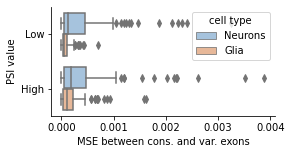

In [109]:
plt.figure(figsize=[4,2])
sns.boxplot(data=pd.concat((HPC_mse_neur2, HPC_mse_glia2)),
            x='value', y='variable', hue='cell type',
           palette=['#9DC3E6', '#F4B68C'])
sns.despine()
plt.xlabel('MSE between cons. and var. exons')
plt.ylabel('PSI value')
plt.show()

In [63]:
def mse_peaks(RBP, exons_info, peaks, PSI_glia, PSI_neur, RBP_counts):
    
    rng = 400
    bins = 50
        
    bins_RBP = np.zeros((len(exons_info),850))

    for k in tqdm(range(len(exons_info))):

        pk_start = peaks[RBP].loc[exons_info[3].values[k]][:,0]
        pk_end = peaks[RBP].loc[exons_info[3].values[k]][:,1]
        exon_start = int(exons_info[1].iloc[k])
        exon_end = int(exons_info[2].iloc[k])

        if exon_end - exon_start < 50:
            continue

        start_bins=[]
        end_bins=[]

        ## Check 1
        start_bin1 = pk_start - exon_start + rng
        start_bin1_keep = (start_bin1 >= 0)  & (start_bin1 < rng)
        start_bins.extend(start_bin1[start_bin1_keep])

        end_bin1 = pk_end - exon_start + rng
        end_bin1_keep = (end_bin1 >= 0) & (end_bin1 < rng)
        end_bins.extend(end_bin1[end_bin1_keep])

        ## Check 2
        start_bin2 = np.round(np.array((bins/(exon_end-exon_start))*(pk_start-exon_start), dtype=float)) + rng
        start_bin2_keep = (start_bin2 >= 400) & (start_bin2 <= 450)
        start_bins.extend(start_bin2[start_bin2_keep])

        end_bin2 = np.round(np.array((bins/(exon_end-exon_start))*(pk_end-exon_start), dtype=float)) + rng
        end_bin2_keep = (end_bin2 >= 400) & (end_bin2 <= 450)
        end_bins.extend(end_bin2[end_bin2_keep])

        ## Check 3
        start_bin3 = pk_start - exon_end + rng + bins
        start_bin3_keep = (start_bin3 > 450) & (start_bin3 < 850)
        start_bins.extend(start_bin3[start_bin3_keep])

        end_bin3 = pk_end - exon_end + rng + bins
        end_bin3_keep = (end_bin3 > 450) & (end_bin3 < 850)
        end_bins.extend(end_bin3[end_bin3_keep])

        start_bins=np.array(start_bins,dtype=int)
        end_bins=np.array(end_bins,dtype=int)

        if len(end_bins) > 0:

            if len(start_bins) == 0:
                bins_RBP[k,:end_bins[0]] = 1
            elif end_bins[0] < start_bins[0]:
                bins_RBP[k,:end_bins[0]] = 1
                j = 1
            else:
                j = 0

        for i in range(len(start_bins)):
            
            if len(end_bins) == 0:
                bins_RBP[k,start_bins[i]:] = 1
            
            elif j >= len(end_bins):
                bins_RBP[k,start_bins[i]:] = 1
            else:
                bins_RBP[k,start_bins[i]:end_bins[j]] = 1
                j += 1

        if exons_info[4].iloc[k] == '-':
            bins_RBP[k] = np.flip(bins_RBP[k])

    var_exons = np.abs(PSI_glia['0'] - PSI_neur['0']) > 0.25
    cons_exons = np.abs(PSI_glia['0'] - PSI_neur['0']) <= 0.25
    
    bins_RBP_var = bins_RBP[var_exons]
    bins_RBP_cons = bins_RBP[cons_exons]
    
    ### Glia
    PSI_var = PSI_glia[var_exons]
    PSI_cons = PSI_glia[cons_exons]
    
    bins_RBP_sum_lowPSI_var = np.sum(bins_RBP_var[PSI_var['0'] < 0.5], axis=0)/np.sum(PSI_var['0'] < 0.5)
    bins_RBP_sum_higPSI_var = np.sum(bins_RBP_var[PSI_var['0'] >= 0.5], axis=0)/np.sum(PSI_var['0'] >= 0.5)    
    bins_RBP_sum_lowPSI_cons = np.sum(bins_RBP_cons[PSI_cons['0'] < 0.5], axis=0)/np.sum(PSI_cons['0'] < 0.5)
    bins_RBP_sum_higPSI_cons = np.sum(bins_RBP_cons[PSI_cons['0'] >= 0.5], axis=0)/np.sum(PSI_cons['0'] >= 0.5)
    
    low_mse = mse(bins_RBP_sum_lowPSI_var, bins_RBP_sum_lowPSI_cons)
    high_mse = mse(bins_RBP_sum_higPSI_var, bins_RBP_sum_higPSI_cons)
    
    exons_low_var = np.sum(np.sum(bins_RBP_var[PSI_var['0'] < 0.5], axis=1) > 0)
    exons_hig_var = np.sum(np.sum(bins_RBP_var[PSI_var['0'] >= 0.5], axis=1) > 0)
    exons_low_cons = np.sum(np.sum(bins_RBP_cons[PSI_cons['0'] < 0.5], axis=1) > 0)
    exons_hig_cons = np.sum(np.sum(bins_RBP_cons[PSI_cons['0'] >= 0.5], axis=1) > 0)

    peaks_low_var = np.sum(bins_RBP_var[PSI_var['0'] < 0.5])
    peaks_hig_var = np.sum(bins_RBP_var[PSI_var['0'] >= 0.5])
    peaks_low_cons = np.sum(bins_RBP_cons[PSI_cons['0'] < 0.5])
    peaks_hig_cons = np.sum(bins_RBP_cons[PSI_cons['0'] >= 0.5])
    
    res_glia = cp.deepcopy(np.array([low_mse, high_mse, exons_low_var, exons_hig_var, 
                    exons_low_cons, exons_hig_cons, peaks_low_var,
                    peaks_hig_var, peaks_low_cons, peaks_hig_cons]))
    ## Neurons
    PSI_var = PSI_neur[var_exons]
    PSI_cons = PSI_neur[cons_exons]
    
    bins_RBP_sum_lowPSI_var = np.sum(bins_RBP_var[PSI_var['0'] < 0.5], axis=0)/np.sum(PSI_var['0'] < 0.5)
    bins_RBP_sum_higPSI_var = np.sum(bins_RBP_var[PSI_var['0'] >= 0.5], axis=0)/np.sum(PSI_var['0'] >= 0.5)    
    bins_RBP_sum_lowPSI_cons = np.sum(bins_RBP_cons[PSI_cons['0'] < 0.5], axis=0)/np.sum(PSI_cons['0'] < 0.5)
    bins_RBP_sum_higPSI_cons = np.sum(bins_RBP_cons[PSI_cons['0'] >= 0.5], axis=0)/np.sum(PSI_cons['0'] >= 0.5)
    
    low_mse = mse(bins_RBP_sum_lowPSI_var, bins_RBP_sum_lowPSI_cons)
    high_mse = mse(bins_RBP_sum_higPSI_var, bins_RBP_sum_higPSI_cons)
    
    exons_low_var = np.sum(np.sum(bins_RBP_var[PSI_var['0'] < 0.5], axis=1) > 0)
    exons_hig_var = np.sum(np.sum(bins_RBP_var[PSI_var['0'] >= 0.5], axis=1) > 0)
    exons_low_cons = np.sum(np.sum(bins_RBP_cons[PSI_cons['0'] < 0.5], axis=1) > 0)
    exons_hig_cons = np.sum(np.sum(bins_RBP_cons[PSI_cons['0'] >= 0.5], axis=1) > 0)

    peaks_low_var = np.sum(bins_RBP_var[PSI_var['0'] < 0.5])
    peaks_hig_var = np.sum(bins_RBP_var[PSI_var['0'] >= 0.5])
    peaks_low_cons = np.sum(bins_RBP_cons[PSI_cons['0'] < 0.5])
    peaks_hig_cons = np.sum(bins_RBP_cons[PSI_cons['0'] >= 0.5])
    
    res_neur = cp.deepcopy(np.array([low_mse, high_mse, exons_low_var, exons_hig_var, 
                    exons_low_cons, exons_hig_cons, peaks_low_var,
                    peaks_hig_var, peaks_low_cons, peaks_hig_cons]))

    
    return res_glia, res_neur